# Projet 2 : Analyse de données nutritionnelles
# Partie 2 : exploration des données

<p> Après le nettoyage des données que nous avons traité dans la première partie, nous allons maintenant explorer les données pour mieux les comprendres et trouver des hypothèses qui aideront le client à réaliser son application</p>

## 1. Importation des librairies

In [1]:
# On importe toutes les librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Données

### 2.1 Chargement des données nettoyées dans la 1ère partie

In [2]:
# on utilise le paramètre low_memory=false pour éviter le warning
data = pd.read_csv('fr.openfoodfacts.org.products-cleaned.csv',sep='\t',low_memory=False)

### 2.2 Exploration rapide

In [3]:
data.shape

(58409, 13)

=> **Notre dataset est composé de 13 features et de 58409 lignes.**

In [4]:
data.head()

,product_name,brands_tags,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Mini Confettis,alice-delice,d,1753.0,NaN,0.8,NaN,87.7,0.9,0.6,0.0100,14.0,14.0
1,Praliné Amande Et Noisette,alice-delice,d,2406.0,NaN,2.9,NaN,50.3,3.9,9.5,0.0030,14.0,14.0
2,"Pepsi, Nouveau goût !",pepsi,e,177.0,0.0,0.0,10.4,10.4,0.0,0.0,0.0254,13.0,2.0
3,Tarte Poireaux Et Lardons,bo-frost,d,1079.0,NaN,11.0,NaN,1.0,1.4,7.5,0.8000,15.0,15.0
4,7Up,"7up,pepsico",e,177.0,0.0,0.0,10.4,10.4,NaN,0.0,0.1000,13.0,2.0


In [5]:
data.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,5.840900e+04,41410.000000,58409.000000,41359.000000,58409.000000,42877.000000,58409.000000,58409.000000,58133.000000,58133.000000
mean,1.175475e+03,13.209237,5.384689,27.357943,13.164691,2.508226,7.776230,1.136297,8.608845,8.299107
std,1.349282e+04,16.794454,8.551593,27.183592,18.947330,4.613130,7.883058,4.096356,9.017072,9.353665
min,0.000000e+00,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,4.320000e+02,1.300000,0.300000,4.000000,1.000000,0.000000,1.800000,0.080000,1.000000,0.000000
50%,1.033000e+03,6.800000,1.900000,14.100000,4.000000,1.300000,6.000000,0.570000,9.000000,7.000000
75%,1.647000e+03,21.000000,7.300000,52.600000,17.000000,3.200000,11.000000,1.250000,15.000000,16.000000
max,3.251373e+06,380.000000,210.000000,190.000000,104.000000,178.000000,100.000000,211.000000,40.000000,36.000000


=> Nous constatons déjà que certaines propriétés contiennent des valeurs anormales au niveau du maximum qui est supérieur à 100g pour certaines features (fat, saturated_fat,...)<br/>
=> Le sucre a une valeur minimum négative (anormale)<br/>
=> Nous remarquons aussi une légère similitude entre le nutrion score fr et uk (au niveau mean, min, std, ...)<br/>
=> Les valeurs aberantes seront traitées dans la section **3.1**

### 2.3 Valeurs manquantes (missing values)

In [6]:
# count the number of NaN values in each column
print(data.isnull().sum())

product_name                   0
brands_tags                  162
nutrition_grade_fr           276
energy_100g                    0
fat_100g                   16999
saturated-fat_100g             0
carbohydrates_100g         17050
sugars_100g                    0
fiber_100g                 15532
proteins_100g                  0
salt_100g                      0
nutrition-score-fr_100g      276
nutrition-score-uk_100g      276
dtype: int64


==> **Certaines propriétés ont beaucoup de valeurs vides : fat, carbohydrates, fiber**

**Traitement des valeurs manquantes**<br/>
==> Nous avons fait le choix de remplacer les propriétés avec beaucoup de valeurs manquantes par une valeure moyenne (mean) de la propriété : fat, carbohydrates, fiber<br/>
=> pour les autres valeurs manquantes on remplace par 0
<p>
Il aurait égalemetn été intéressant d'utiliser <strong>un algorithme de régression linéaire</strong> pour apprendre à la machine à prédire les valeurs manquantes à partir d'un apprentissage sur les données renseignées. 
</p>


In [7]:
# Remplacement des valeurs vides par la moyenne
data['fat_100g'].fillna(data['fat_100g'].mean(), inplace=True)
data['carbohydrates_100g'].fillna(data['carbohydrates_100g'].mean(), inplace=True)
data['fiber_100g'].fillna(data['fiber_100g'].mean(), inplace=True)

# Remplacement des autres valeurs vides par 0
data.fillna(0, inplace=True)
# Nombre de NaN dans chaque colonne
print(data.isnull().sum())

product_name               0
brands_tags                0
nutrition_grade_fr         0
energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
nutrition-score-fr_100g    0
nutrition-score-uk_100g    0
dtype: int64


==> Maintenant que les données sont propres, commençons par une analyse univariée de chacune des features

## 3. Analyse univariée

### 3.0 Fonction réutilisable pour afficher histogramme et description d'une variable

In [8]:
# Affiche la description de la variable dans le dataframe df
def display_description(df, variable) :
    print("Description variable " + variable )
    print(df[variable].describe())

# Affichage histogramme correspondant à la variable dans la couleur spécifiée
def draw_histogram(df, variable, color) :
    df.hist(column=variable,figsize=(6,6),color=color)

# fonction qui remplace les valeurs anormales trop grandes par la moyenne des valeurs
# df : dataframe à traiter
# variable : la feature concernée
# limit : valeur à partir de laquelle, on considère que la valeur est anormale et qu'il faut remplacer par la moyenne.
def replace_outlier_values_by_mean(df,variable,limit):
    # On calcule la moyenne 
    mean=df.loc[df[variable]<limit, variable].mean()
    # On remplace chaque donnée > limite par la moyenne
    df[variable] = np.where(df[variable] > limit, mean,df[variable])

<p>
Une meilleure solution aurait été d'utiliser <strong>un algorithme de régression linéaire</strong> pour apprendre à la machine à prédire les valeurs anormales à partir d'un apprentissage sur les données renseignées. Nous n'avons pas fait ce choix dans ce TP par souci de simplicité.
</p>

### 3.1 Macronutritions

#### Matière grasse (fat)
On commence par explorer les élèments de macronutritions : **matière grasse (fat), protéine, carbohydrate et sucres**

In [9]:
display_description(data,"fat_100g")

Description variable fat_100g
count    58409.000000
mean        13.209237
std         14.140901
min          0.000000
25%          2.900000
50%         13.209237
75%         13.600000
max        380.000000
Name: fat_100g, dtype: float64


- On remarque qu'il y a des produits qui ont plus de 100g de gras (valeure aberrante). 
- **On les remplace par la moyenne**

In [10]:
replace_outlier_values_by_mean(data,"fat_100g",100)

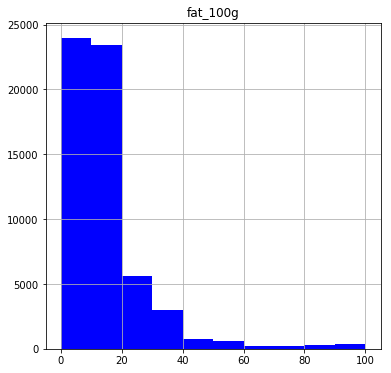

In [11]:
# Affichage d'un histogramme pour avoir une idée de la distribution de la variable
draw_histogram(data,"fat_100g",'blue')

==> On constate une distribution à gauche. La majorité des produits ont une quantité raisonnable de gras

#### Gras saturé (satured-fat)

In [12]:
display_description(data,"saturated-fat_100g")

Description variable saturated-fat_100g
count    58409.000000
mean         5.384689
std          8.551593
min          0.000000
25%          0.300000
50%          1.900000
75%          7.300000
max        210.000000
Name: saturated-fat_100g, dtype: float64


==> on remplace les valeurs anormales (210g) par la moyenne

In [13]:
# On remplace les valeurs anormales 
replace_outlier_values_by_mean(data,"saturated-fat_100g",100)

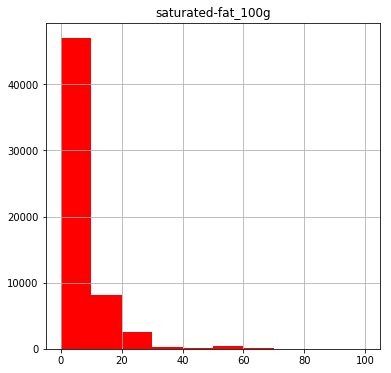

In [14]:
# Gras saturé - Analyse
draw_histogram(data,"saturated-fat_100g",'red')

- La plupart des produits contient peu de gras saturé
- il y a quand même un petit de produits avec plus de 50g de gras saturé

In [15]:
prod_gras = data[data['saturated-fat_100g'] > 50]
prod_gras['product_name']

27                                Pure Flow Chips Coco Bio
297      Sauce Original Caesar Cardini : « Original Cae...
558                                     extra virgin cocos
660      Coconut Merchant Organic Raw Extra Virgin Coco...
661                                          Huile de coco
666                                           Cheese Balls
799                                                   Anda
1194                                     Amandes en poudre
1300                                     Frites & Fritures
1647                             Beurre Gastronomique Doux
1652                   Beurre Gastronomique Doux (82 % MG)
1653     Beurre gastronomique demi-sel. Matières grasse...
1654                       Beurre doux extra fin (82 % MG)
1708         Beurre aux cristaux de Sel de Mer Noirmoutier
1750                                   Prosecco Del Veneti
1931                                      Beurre extra fin
2045        Norman Court School Girls' Stripe Summer Dre

** ce sont essentiellement des produits comme les beurres et les huiles qu'il faudra limiter pour une recette saine**

#### Carbohydrates

In [16]:
display_description(data,"carbohydrates_100g")

Description variable carbohydrates_100g
count    58409.000000
mean        27.357943
std         22.874439
min          0.000000
25%          8.000000
50%         27.357943
75%         33.000000
max        190.000000
Name: carbohydrates_100g, dtype: float64


In [17]:
# On remplace les valeurs anormales 
replace_outlier_values_by_mean(data,"carbohydrates_100g",100)

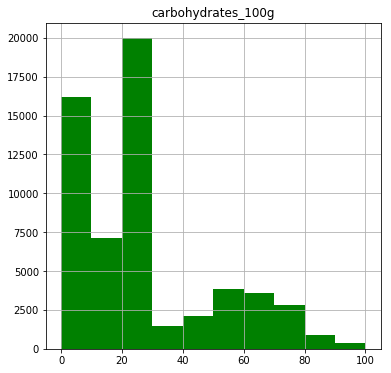

In [18]:
draw_histogram(data,"carbohydrates_100g",'green')

=> la distribution est bi-modal<br/>
=> on constate un pic entre 0 et 30 et de petits pics entre 50 et 80

#### Protéines

In [19]:
display_description(data,"proteins_100g")

Description variable proteins_100g
count    58409.000000
mean         7.776230
std          7.883058
min          0.000000
25%          1.800000
50%          6.000000
75%         11.000000
max        100.000000
Name: proteins_100g, dtype: float64


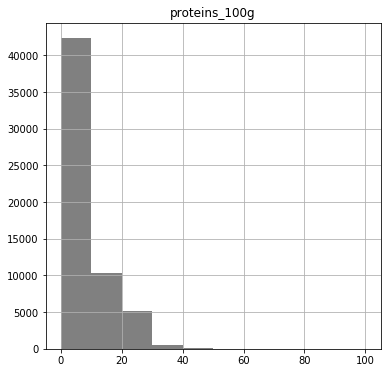

In [20]:
draw_histogram(data,"proteins_100g",'gray')

- Distribution à gauche. 
- Il y a quelques produits avec beaucoup de protéines

In [21]:
prod_protein = data[data['proteins_100g'] > 75]
prod_protein

,product_name,brands_tags,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
624,Savarez - Jeu De Cordes,savarez,a,4.0,13.209237,0.10,27.357943,0.10,100.000000,100.00,0.00000,-10.0,-10.0
720,Harry Potter & The Deathly Hallows Radcliffe /...,harry-s,a,4.0,13.209237,0.00,27.357943,0.00,100.000000,100.00,0.00000,-10.0,-10.0
2663,Crownfield Choco Rice,fairtrade,c,1623.0,13.209237,1.10,27.357943,28.90,5.400000,84.20,0.50000,8.0,8.0
7993,Sirop Fraise,teisseire,e,180.0,0.000000,0.00,10.600000,10.60,0.000000,86.00,0.00000,14.0,-3.0
11168,Le saunier de camargue,le-saunier-de-gamargue,e,243.0,13.209237,36.00,27.357943,0.50,0.000000,96.00,100.00000,20.0,20.0
19720,Creme Lavante,super-u,c,4.0,13.209237,61.00,27.357943,0.70,80.000000,80.00,0.40000,6.0,6.0
21078,Edulcorant a l'extrait de stevia,cora,b,1556.0,13.209237,0.00,27.357943,6.90,0.000000,93.10,0.08000,0.0,0.0
26542,Gluten de blé,celnat,a,1594.0,2.000000,0.30,13.800000,0.00,0.100000,77.00,0.01000,-1.0,-1.0
27551,"Lingettes pocket pour visage et mains, biodégr...",biolane,d,1912.0,13.209237,6.00,27.357943,6.00,1.000000,99.00,2.00000,18.0,18.0
27589,Apurna Pure Whey Isolat Vanille - Pot 750G,apurna,b,1602.0,13.209237,1.10,27.357943,3.10,1.000000,81.30,0.23000,0.0,0.0


=> Le sirop de fraise semble étrange dans cette liste<br/>
=> on voit qu'il y a beaucoup de produits protéinés (compléments alimentaires)

#### Sucres

In [22]:
display_description(data,"sugars_100g")

Description variable sugars_100g
count    58409.000000
mean        13.164691
std         18.947330
min         -0.100000
25%          1.000000
50%          4.000000
75%         17.000000
max        104.000000
Name: sugars_100g, dtype: float64


In [23]:
# On remplace les valeurs anormales > 100 par la moyenne
replace_outlier_values_by_mean(data,"sugars_100g",100)

# On calcule la moyenne 
mean=data.loc[data['sugars_100g']>0, 'sugars_100g'].mean()
# On remplace chaque donnée > limite par la moyenne
data['sugars_100g'] = np.where(data['sugars_100g'] < 0, mean,data['sugars_100g'])

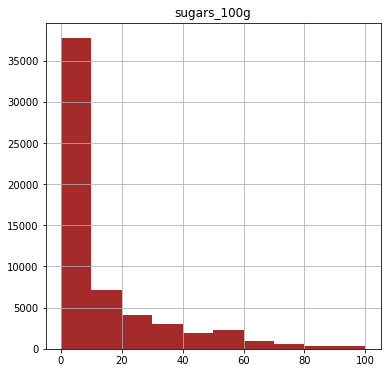

In [24]:
draw_histogram(data,"sugars_100g",'brown')

+ ** Distribution à gauche mais il y a certains produits qui contiennent des quantités de sucres non négligeables**
+ Il faudra faire attention au sucre dans nos recettes car le sucre est à éviter

In [25]:
# On affiche les produits qui contiennent plus de 40g de sucre
data[data['sugars_100g'] > 40]

,product_name,brands_tags,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Mini Confettis,alice-delice,d,1753.0,13.209237,0.8,27.357943,87.7,0.900000,0.6,0.0100,14.0,14.0
1,Praliné Amande Et Noisette,alice-delice,d,2406.0,13.209237,2.9,27.357943,50.3,3.900000,9.5,0.0030,14.0,14.0
24,Mini Crêpes ChocoLait,bijou,e,2018.0,18.000000,11.0,72.000000,48.0,1.700000,6.7,0.2000,24.0,24.0
25,Ginger candy,sina,d,1632.0,1.400000,0.9,94.500000,70.3,2.508226,0.0,0.0000,14.0,14.0
32,Soft Baked Chocolate Chunk Dark Chocolat Brownie,pepperidge-farm,e,1946.0,19.200000,10.6,67.300000,41.7,5.700000,5.3,0.5000,21.0,21.0
33,Oatmeal Raisin,"soft-baked,pepperidge-farm",d,1753.0,14.500000,4.8,74.200000,41.9,6.500000,6.5,0.7366,16.0,16.0
34,Soft Baker chocolate chunk,pepperidge-farm,e,1916.0,17.100000,9.5,70.800000,40.8,2.200000,4.8,0.6000,22.0,22.0
65,Brins de ChocoCaramel,bijou,e,1960.0,16.000000,9.5,75.000000,50.0,1.000000,5.0,0.2800,24.0,24.0
76,Mini Snack Raisins,sainsbury-s,c,1377.0,13.209237,0.5,27.357943,67.1,4.200000,2.0,0.0100,9.0,9.0
77,Crème de marrons de l'Ardèche,clement-faugier,c,1130.0,0.800000,0.2,63.600000,50.2,1.900000,1.3,0.0100,10.0,10.0


=> Ce sont essentiellement les bonbons (sucreries),les chocolas, les biscuits, les crèmes, ...

### 4.2 Autres critères
#### Energie

In [26]:
display_description(data,"energy_100g")

Description variable energy_100g
count    5.840900e+04
mean     1.175475e+03
std      1.349282e+04
min      0.000000e+00
25%      4.320000e+02
50%      1.033000e+03
75%      1.647000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64


** On voit que les valeurs sont en kJ comme indiqué dans la description **
1 g de lipide donne 38 kJ, on peut donc dire qu'un aliment de 100g aura au maximum 4000 kJ.
=> Les données contiennent des valeurs anormalement supérieurs. On les remplace par la moyenne.

In [27]:
# On remplace les valeurs anormales 
replace_outlier_values_by_mean(data,"energy_100g",4000)

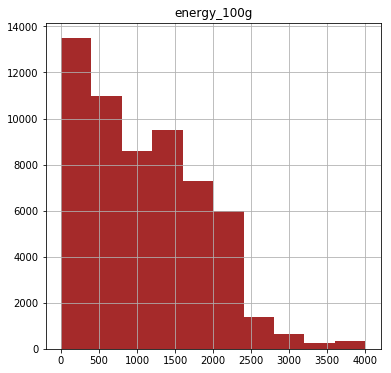

In [28]:
draw_histogram(data,"energy_100g",'brown')

=> On a une distribution à gauche mais avec pas mal d'aliments content au moins 2500 kj<br/>
=> affichons les aliments à plus de 3000 kJ

In [29]:
prod_energie = data[data['energy_100g'] > 2500]
prod_energie

,product_name,brands_tags,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
27,Pure Flow Chips Coco Bio,pure-via,d,2920.0,13.209237,64.00,27.357943,7.30,11.000000,6.8,0.10000,14.0,14.0
35,Almonds Amandes grillées salées,wonderful,d,2549.0,52.100000,4.00,10.300000,4.90,2.508226,21.1,0.80000,14.0,14.0
36,ALMONDS Roasted Salted,wonderful,d,2577.0,13.209237,4.00,27.357943,4.90,0.000000,21.1,0.80000,14.0,14.0
37,Amandes Grillées Salées,wonderful,d,2577.0,52.100000,4.00,10.300000,4.90,2.508226,21.0,0.80000,14.0,14.0
51,Walnuts,wonderful,d,2992.0,65.200000,6.10,13.700000,2.60,2.508226,15.2,0.03000,14.0,14.0
121,Nappage Saveur Chocolat Et Saveur Beurre De Ca...,reese-s,e,2510.0,13.209237,31.00,27.357943,43.00,0.000000,1.0,0.40000,27.0,27.0
139,Beurre de cacahuètes crémeux,skippy,d,2720.0,51.600000,10.00,18.800000,10.90,4.700000,25.3,1.13000,18.0,18.0
140,Skippy extra-crunchy supercrunch,skippy,d,2679.0,52.200000,10.00,16.600000,9.40,3.800000,25.6,0.85000,16.0,16.0
169,Toasted Pumpkin,mark-spencer,c,2552.0,13.209237,6.20,27.357943,1.50,6.500000,24.5,0.10000,8.0,8.0
237,beurre d'arachide croquant,menu-bleu,c,2790.0,53.300000,6.67,20.000000,6.67,6.670000,20.0,0.00000,10.0,10.0


=> on voit tous les produits comme le beurre, les apéritifs, ..

#### Sel

In [30]:
display_description(data,"salt_100g")

Description variable salt_100g
count    58409.000000
mean         1.136297
std          4.096356
min          0.000000
25%          0.080000
50%          0.570000
75%          1.250000
max        211.000000
Name: salt_100g, dtype: float64


In [31]:
# On remplace les valeurs anormales > 100  
replace_outlier_values_by_mean(data,"salt_100g",100)

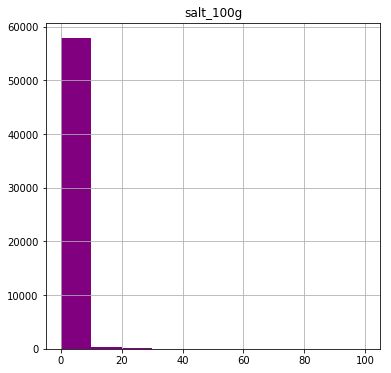

In [32]:
draw_histogram(data,"salt_100g",'purple')

+ Distribution à gauche
+ La plupart des produits ne contiennent pas énormement de sel
+ Le sel est à limiter pour une alimentation saine

#### Fibres

In [33]:
display_description(data,"fiber_100g")

Description variable fiber_100g
count    58409.000000
mean         2.508226
std          3.952453
min          0.000000
25%          0.300000
50%          2.500000
75%          2.508226
max        178.000000
Name: fiber_100g, dtype: float64


In [34]:
# On remplace les valeurs anormales > 100  
replace_outlier_values_by_mean(data,"fiber_100g",100)

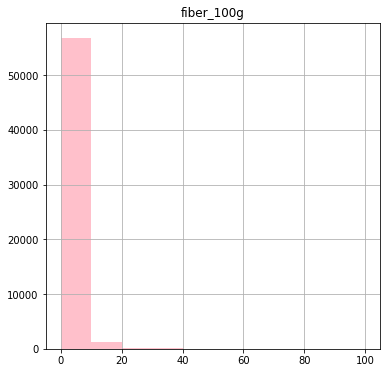

In [35]:
draw_histogram(data,"fiber_100g",'pink')

+ Distribution encore à gauche
+ La plupart des produits avec peu de fibres
+ Il faudra privilégier les produits riches en fibres pour une recette saine

### 4.3 Nutrition score

#### Analyse score France et un score UK

Observons la différence

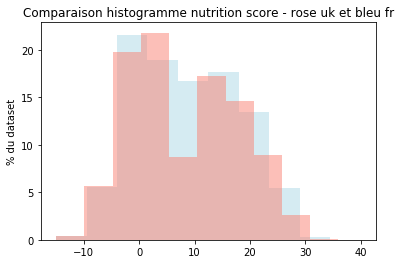

In [36]:
x = data["nutrition-score-fr_100g"]
y = data["nutrition-score-uk_100g"]

xweights = 100 * np.ones_like(x) / x.size
yweights = 100 * np.ones_like(y) / y.size

fig, ax = plt.subplots()
ax.hist(x, weights=xweights, color='lightblue', alpha=0.5)
ax.hist(y, weights=yweights, color='salmon', alpha=0.5)

ax.set(title='Comparaison histogramme nutrition score - rose uk et bleu fr', ylabel='% du dataset')
ax.margins(0.05)
ax.set_ylim(bottom=0)
plt.show()

=> Distribution assez identique sauf aux alentours de 10 où il y a une différence importante entre le score anglais et français

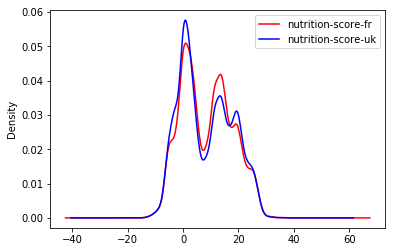

In [37]:
ax =data["nutrition-score-fr_100g"].plot(kind="density", color="red")
ax2=data["nutrition-score-uk_100g"].plot(kind="density", color="blue")
ax2.legend(["nutrition-score-fr","nutrition-score-uk"])

- Les 2 variables ne différent pas beaucoup l'une 
- Elles ont à peu près la même distribution
- On constate un pic dans l'intervale [-5,5]

In [38]:
# calcul du score de correlation
data['nutrition-score-fr_100g'].corr(data['nutrition-score-uk_100g'])

0.96285342500450144

=> On a un bon score de corrélation

** => Nous pouvons ne nous concentrer que la score FR pour notre étude car elle concerne un client français**

#### Nutrition Grade

- La variable n'est pas une donnée numérique mais contient des "categorical values"

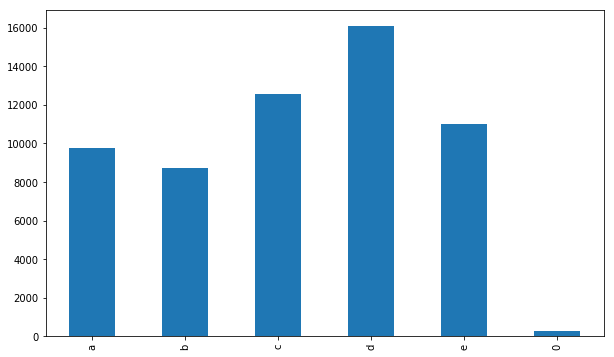

In [39]:
# affichage histogramme de nutrition grade
data["nutrition_grade_fr"].value_counts().reindex(['a', 'b', 'c', 'd','e',0]).plot(kind='bar', figsize=(10,6))

<p>** Nous avons un nombre non négigleable des produits avec des notes c,d et e.**<br/>
Nous voyons quelques produits sans note <br/>
La distribution est plutôt uniforme / équilibré entre les différentes notes.
</p>
+ a = très bonne qualité nutritionnelle
+ e : mauvaise qualité nutritionnelle

** => Pour le projet il faudra donc privélégier les produits ayant une notre proche de a et b **

### 4.4 Analyse

** Structure de la base de données **<br/>
Nous avons 12 features et 54921 produits

** Les features qui semblent intéressants pour l'objectif du client **<br/>
    Les propriétés qui me semblent utiles pour déterminer un produit sain : **nutrition_grade_fr, nutrition-score-fr_100g, fat_100g, saturated-fat_100g sugars_100g, proteine_100g, fiber_100g, energy_100g**
<br>

## 5. Analyse bivariée

### 5.1 Correlation

In [40]:
# affichage 
corr = data.corr()
corr

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
energy_100g,1.000000,0.655403,0.572143,0.431840,0.317284,0.172293,0.199919,-0.020691,0.621693,0.682040
fat_100g,0.655403,1.000000,0.588513,-0.072651,-0.006945,0.032502,0.111024,0.013623,0.482191,0.556039
saturated-fat_100g,0.572143,0.588513,1.000000,-0.024064,0.070435,0.012188,0.145004,0.011520,0.599016,0.642138
carbohydrates_100g,0.431840,-0.072651,-0.024064,1.000000,0.517514,0.138820,-0.109232,-0.062556,0.198740,0.191694
sugars_100g,0.317284,-0.006945,0.070435,0.517514,1.000000,0.027704,-0.251224,-0.089034,0.444169,0.411612
fiber_100g,0.172293,0.032502,0.012188,0.138820,0.027704,1.000000,0.168102,0.007413,-0.112858,-0.098523
proteins_100g,0.199919,0.111024,0.145004,-0.109232,-0.251224,0.168102,1.000000,0.104427,0.098893,0.165284
salt_100g,-0.020691,0.013623,0.011520,-0.062556,-0.089034,0.007413,0.104427,1.000000,0.103679,0.114862
nutrition-score-fr_100g,0.621693,0.482191,0.599016,0.198740,0.444169,-0.112858,0.098893,0.103679,1.000000,0.962853
nutrition-score-uk_100g,0.682040,0.556039,0.642138,0.191694,0.411612,-0.098523,0.165284,0.114862,0.962853,1.000000


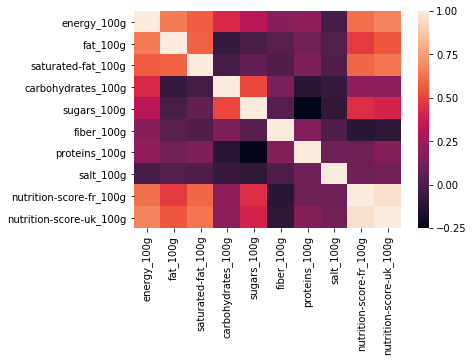

In [41]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

=> on remarque une certaine correlation entre 
- l'énergie et le gras, l'énergie et le gras saturé, l'énergie et le score nutritionnel, l'énergie et le carbohydrate
- le gras et le gras saturé, le gras et le score nutritionnel
- le gras saturé et le score nutrionnel
- le carbohydrate et le sucre
- le sucre et le score nutrionnel
- le score nutrionnel fr et uk

=> On constate une corrélation inversée entre le sucre et les protéines

### 5.2 Analyse

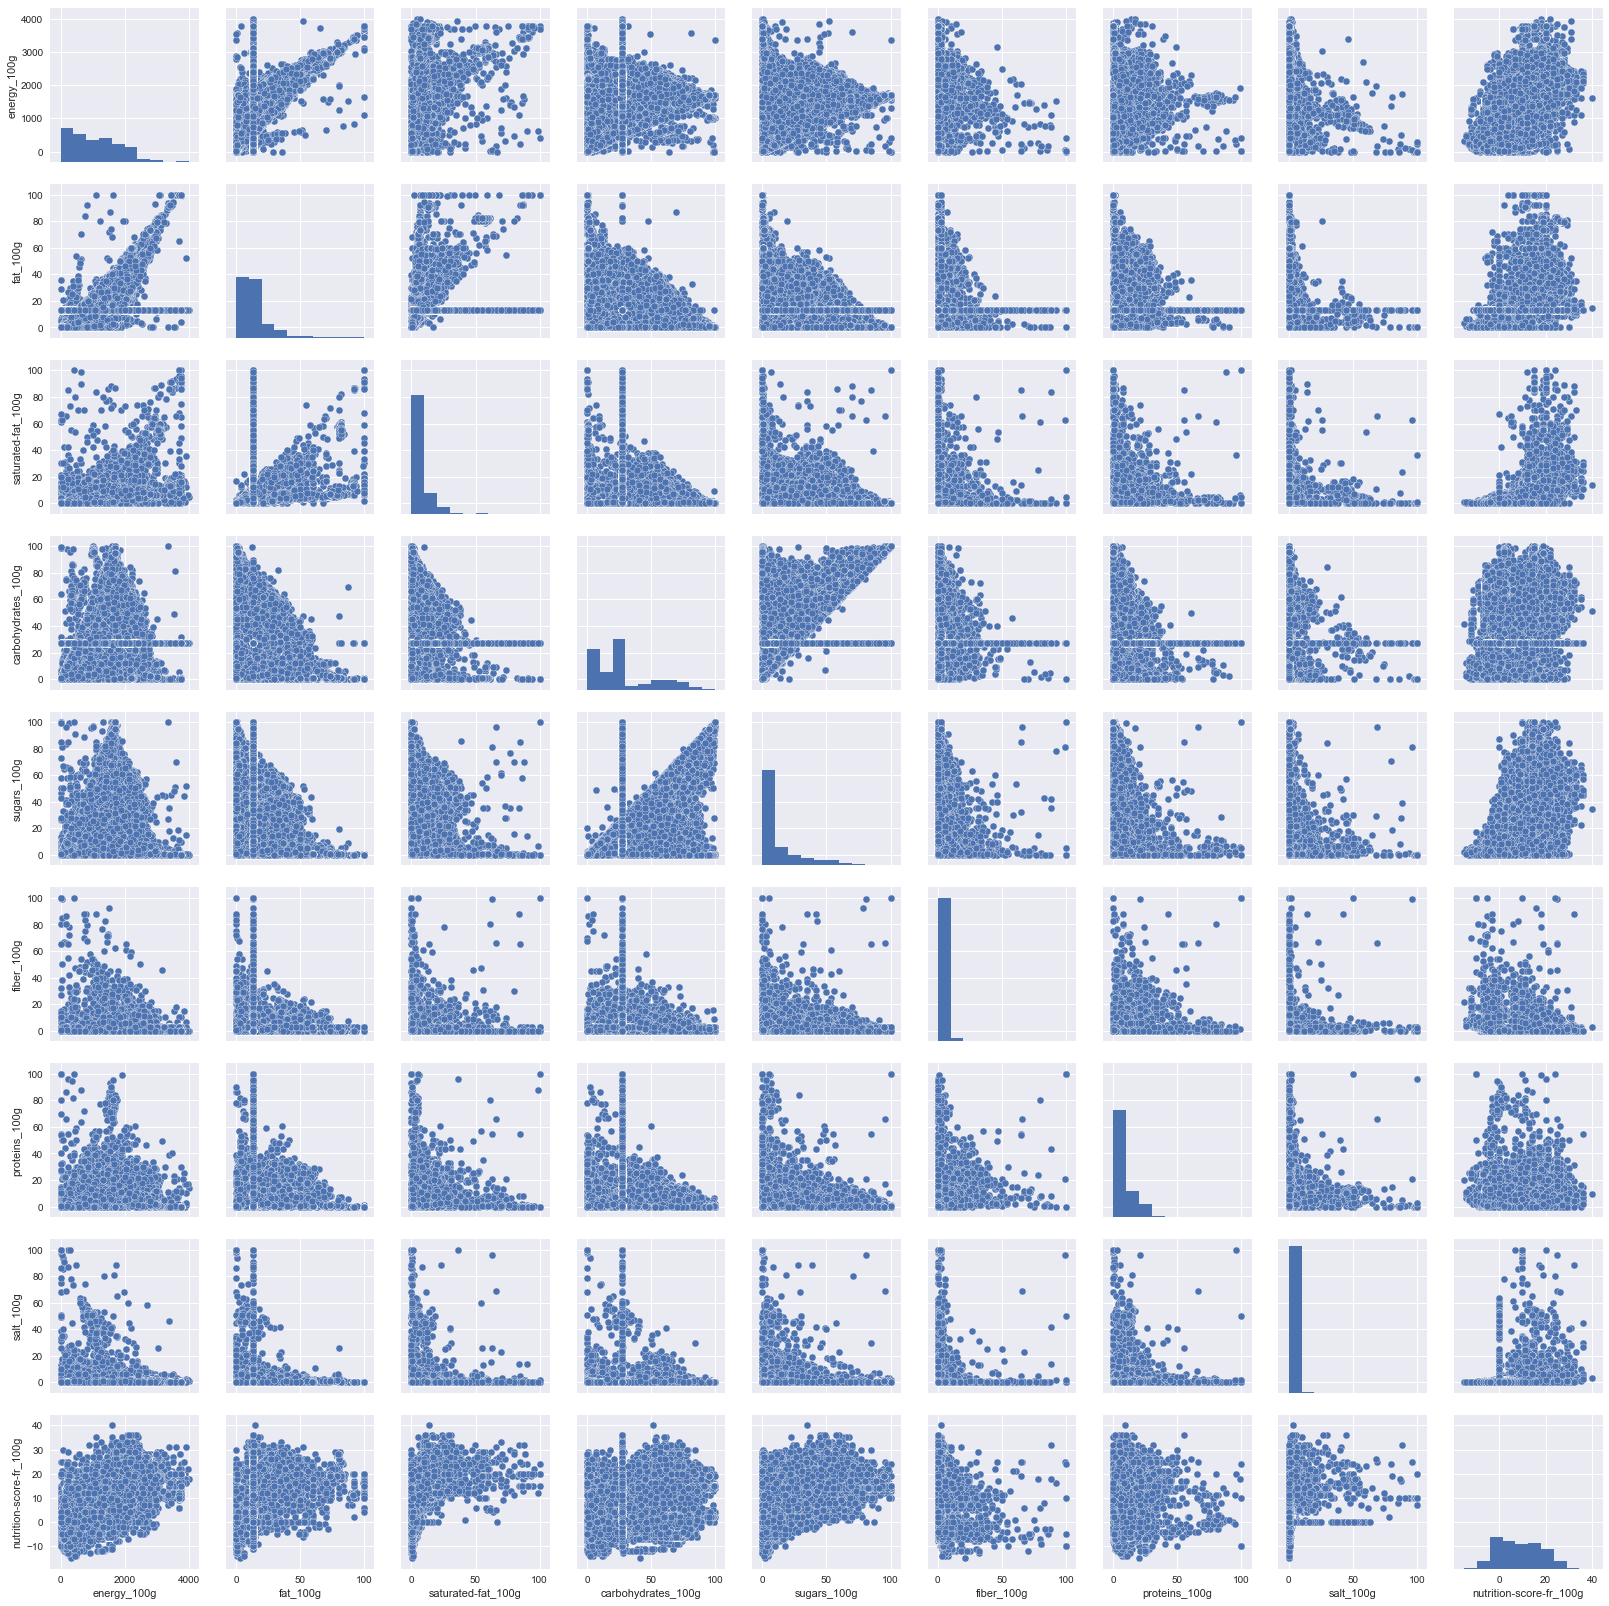

In [42]:
#scatterplot
sns.set()
cols = ['energy_100g', 'fat_100g', 'saturated-fat_100g','carbohydrates_100g', 'sugars_100g', 'fiber_100g','proteins_100g','salt_100g','nutrition-score-fr_100g']
sns.pairplot(data[cols], size = 2.5)
plt.show()

#### Nutrion score et gras saturé

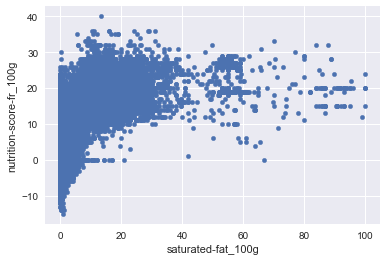

In [43]:
var = 'saturated-fat_100g'
df = pd.concat([data['nutrition-score-fr_100g'], data[var]], axis=1)
df.plot.scatter(x=var, y='nutrition-score-fr_100g');

=> Le gras saturé donne un score élevé au score nutritionnel. Il faudra donc l'éviter pour une recette saine

#### Nutrion score et gras

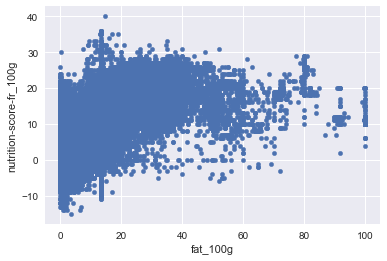

In [44]:
var = 'fat_100g'
df = pd.concat([data['nutrition-score-fr_100g'], data[var]], axis=1)
df.plot.scatter(x=var, y='nutrition-score-fr_100g');

=> Le gras  donne un score élevé au score nutritionnel. Il faudra donc l'éviter pour une recette saine

#### Nutrion score et sucre

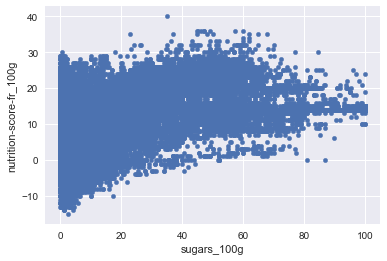

In [45]:
var = 'sugars_100g'
df = pd.concat([data['nutrition-score-fr_100g'], data[var]], axis=1)
df.plot.scatter(x=var, y='nutrition-score-fr_100g');

=> Le sucre donne un score élevé au score nutritionnel. Il faudra donc l'éviter pour une recette saine

#### Nutrion score et sel

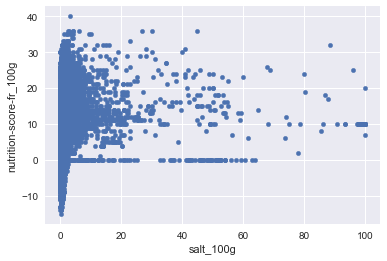

In [46]:
var = 'salt_100g'
df = pd.concat([data['nutrition-score-fr_100g'], data[var]], axis=1)
df.plot.scatter(x=var, y='nutrition-score-fr_100g');

=> dans une certaine mesure le sel est à éviter pour avoir des repas sains

#### Nutrion score et energie

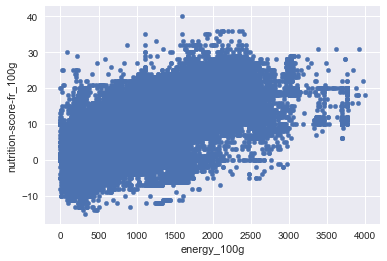

In [47]:
var = 'energy_100g'
df = pd.concat([data['nutrition-score-fr_100g'], data[var]], axis=1)
df.plot.scatter(x=var, y='nutrition-score-fr_100g');

=> On voit une certaine dépendance entre l'énergie et le score

#### Nutrion score et protéine

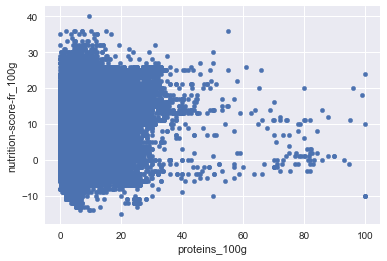

In [48]:
var = 'proteins_100g'
df = pd.concat([data['nutrition-score-fr_100g'], data[var]], axis=1)
df.plot.scatter(x=var, y='nutrition-score-fr_100g');

=> Les protéines sont bien à privilégier pour avoir un meilleur score nutritionnel

#### Nutrion score et fibre

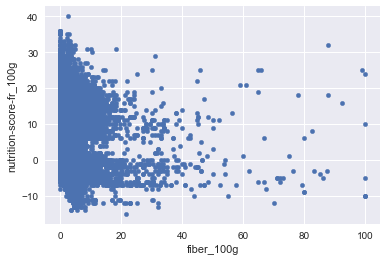

In [49]:
var = 'fiber_100g'
df = pd.concat([data['nutrition-score-fr_100g'], data[var]], axis=1)
df.plot.scatter(x=var, y='nutrition-score-fr_100g');

=> Les aliments riches en fibres ont un meilleur score nutrionnel

## 5.3 Interpretation

L'analyse confirme que les aliments riche en graisse, en graisse saturé et en sucre ont un moins bon score nutrionnel 

# Conclusion

- La base de donnée a été nettoyée pour mieux tirer partie des données
- Nous avons pu analyser chacune des features qui nous paraissent intéressantes pour notre étude
- Il faudra privilégier les aliments pauvre en gras, gras saturé, sucre et energie et privilégier ceux qui contiennent des fibres et des protéines. Il faudra aussi limiter les quantités de sels.
- Nous pouvons nous baser sur le score nutrionnel et le nutrition grade pour identifier les aliments sains
- Cependant la base de données ne contient que des aliments manufacturés. Il n'y a pas de fruits et légumes frais qui sont indispensables à une alimentation saine